In [0]:
#necessary library
import datetime
import pandas as pd
import numpy as np
import time
import scipy.stats as stats

In [2]:
#mount google drive as a local hard
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
output_dateset = '/content/gdrive/My Drive/australia_phd/phd_data/all_dataset_out_copy.csv'
output_database_st = '/content/gdrive/My Drive/australia_phd/phd_data/database_data/database_ouptout_final_student_filtered.csv'

In [0]:
def load_dataset(path):
  data_set = pd.read_csv(path)
  return data_set

In [0]:
def load_database(path):
  data_set = pd.read_csv(path, names = ['bin', 'mac', 'rss','time_stamp'], skiprows=1)
  return data_set

In [0]:
database = load_database(output_database_st)
dataset = load_dataset(output_dateset)

In [0]:
database['bin'] = database['bin'].astype(str)
database['rss'] = database['rss']*-1

In [0]:
database_matrix = pd.pivot_table(database,values='rss', index=['mac','time_stamp'], columns=['bin'])

In [0]:
database_matrix['user'] = database_matrix.index.get_level_values(0)

In [28]:
database

,bin,mac,rss,time_stamp
7391,13,1,-90,2019-09-25 18:42:09
7392,10,1,-83,2019-09-25 18:42:09
7393,22,1,-89,2019-09-25 18:42:09
7394,4,1,-79,2019-09-25 18:42:09
7395,17,1,-72,2019-09-25 18:42:10
...,...,...,...,...
245537,11,4,-85,2019-10-25 11:23:12
245538,37,4,-82,2019-10-25 11:23:12
245539,38,4,-86,2019-10-25 11:23:14
245540,11,4,-83,2019-10-25 11:23:14


In [0]:
def convert_to_z(df, remove_outlier = True):
  #print(df)
  #return
  columns = ['11', '12', '13', '15', '17','18', '19', '10', '21', '22', '3', '33','37', '38', '39','4', '6', '7', '8', '9']
  df_cp = df.copy()
  #df_cp2 = df.copy()
  #df_cp = df_cp[]
  #df_cpy3 = stats.zscore(df_cp2[columns])
  #print(df_cp2)
  #return
  for i in columns:
    zname = i+' '
    #df_cp = df.copy()
    #print('before')
    #print(df[i].mean())
    #print('--------')
    df_cp[i] = df_cp[i].apply(lambda x: x if x >= -90 else np.nan)
    #print('after')
    #print(df_cp[i].mean())
    #print('-------')
    #df[zname] = (df_cp[i] - df_cp[i].mean())/df_cp[i].std()
    #print(df[zname].dropna())
    #print("---------------")
    df[zname] = (df_cp[i] - df_cp[i].mean())/df_cp[i].std(ddof=1)
    #print(df[zname].dropna())
    if remove_outlier == True:
      df[zname] = df[zname].apply(lambda x: x if (x <= 3 and x >= -3) else np.nan)
    #print(df[zname].dropna())
    #print("*************")
  return df 
tmp_table_z_1 = convert_to_z(database_matrix[database_matrix['user']==1].copy())
tmp_table_z_dataset_1 = convert_to_z(dataset[dataset['user']==1].copy())
tmp_table_z_2 = convert_to_z(database_matrix[database_matrix['user']==2].copy())
tmp_table_z_dataset_2 = convert_to_z(dataset[dataset['user']==2].copy())
tmp_table_z_3 = convert_to_z(database_matrix[database_matrix['user']==3].copy())
tmp_table_z_dataset_3 = convert_to_z(dataset[dataset['user']==3].copy())
tmp_table_z_4 = convert_to_z(database_matrix[database_matrix['user']==4].copy())
tmp_table_z_dataset_4 = convert_to_z(dataset[dataset['user']==4].copy())
#tmp_table_z_2 = convert_to_z(database_matrix[database_matrix['user']==2].copy())
#tmp_table_z_dataset_2 = convert_to_z(dataset[dataset['user']==2].copy)
#tmp_table_z_3 = convert_to_z(database_matrix[database_matrix['user']==3].copy())
#tmp_table_z_dataset_3 = convert_to_z(dataset[dataset['user']==3].copy())
#tmp_table_z_4 = convert_to_z(database_matrix[database_matrix['user']==4].copy())
#tmp_table_z_dataset_4 = convert_to_z(dataset[dataset['user']==4].copy())
total_database = pd.concat([tmp_table_z_1,tmp_table_z_2,tmp_table_z_3,tmp_table_z_4 ],ignore_index=True)
total_dataset = pd.concat([tmp_table_z_dataset_1,tmp_table_z_dataset_2,tmp_table_z_dataset_3,tmp_table_z_dataset_4 ],ignore_index=True)

In [30]:
database_matrix[database_matrix['user']==1]

bin                        10    11    12    13  ...     7     8     9  user
mac time_stamp                                   ...                        
1   2019-09-25 18:42:09 -83.0   NaN   NaN -90.0  ...   NaN   NaN   NaN     1
    2019-09-25 18:42:10   NaN   NaN   NaN   NaN  ... -84.0   NaN   NaN     1
    2019-09-25 18:42:11   NaN -90.0 -90.0   NaN  ...   NaN -86.0   NaN     1
    2019-09-25 18:42:12 -84.0   NaN   NaN   NaN  ... -84.0   NaN   NaN     1
    2019-09-25 18:42:13   NaN   NaN   NaN   NaN  ...   NaN -75.0   NaN     1
...                       ...   ...   ...   ...  ...   ...   ...   ...   ...
    2019-10-25 11:22:16   NaN   NaN   NaN -86.0  ...   NaN   NaN   NaN     1
    2019-10-25 11:22:19   NaN -75.0   NaN   NaN  ...   NaN   NaN   NaN     1
    2019-10-25 11:22:20 -85.0   NaN   NaN   NaN  ...   NaN   NaN   NaN     1
    2019-10-25 11:22:22   NaN -73.0   NaN -84.0  ...   NaN   NaN -90.0     1
    2019-10-25 11:22:23   NaN -70.0   NaN -84.0  ...   NaN   NaN   NaN     1

[15270 rows x 21 columns]

In [0]:
def draw_boxplot(df,compare=True,columnz = False):
  if(compare):
    if(columnz == False):
      boxplot1 = df.boxplot(column=['11', '12', '13', '15', '17','18', '19', '10', '21', '22', '3', '33','37', '38', '39','4', '6', '7', '8', '9'],by='user', grid=False,layout=(4, 5),figsize=(30,10) )
    else:
      boxplot1 = df.boxplot(column=['11 ', '12 ', '13 ', '15 ', '17 ','18 ', '19 ', '10 ', '21 ', '22 ', '3 ', '33 ','37 ', '38 ', '39 ','4 ', '6 ', '7 ', '8 ', '9 '],by='user', grid=False,layout=(4, 5),figsize=(30,10) )  
  else:
    if(columnz == False):
      boxplot1 = df.boxplot(column=['11', '12', '13', '15', '17', '18', '19', '10', '21', '22', '3', '33','37', '38', '39', '4', '6', '7', '8', '9'], grid=False, figsize=(10,10))    
    else:
      boxplot1 = df.boxplot(column=['11 ', '12 ', '13 ', '15 ', '17 ', '18 ', '19 ', '10 ', '21 ', '22 ', '3 ', '33 ','37 ', '38 ', '39 ', '4 ', '6 ', '7 ', '8 ', '9 '], grid=False, figsize=(10,10))   
   

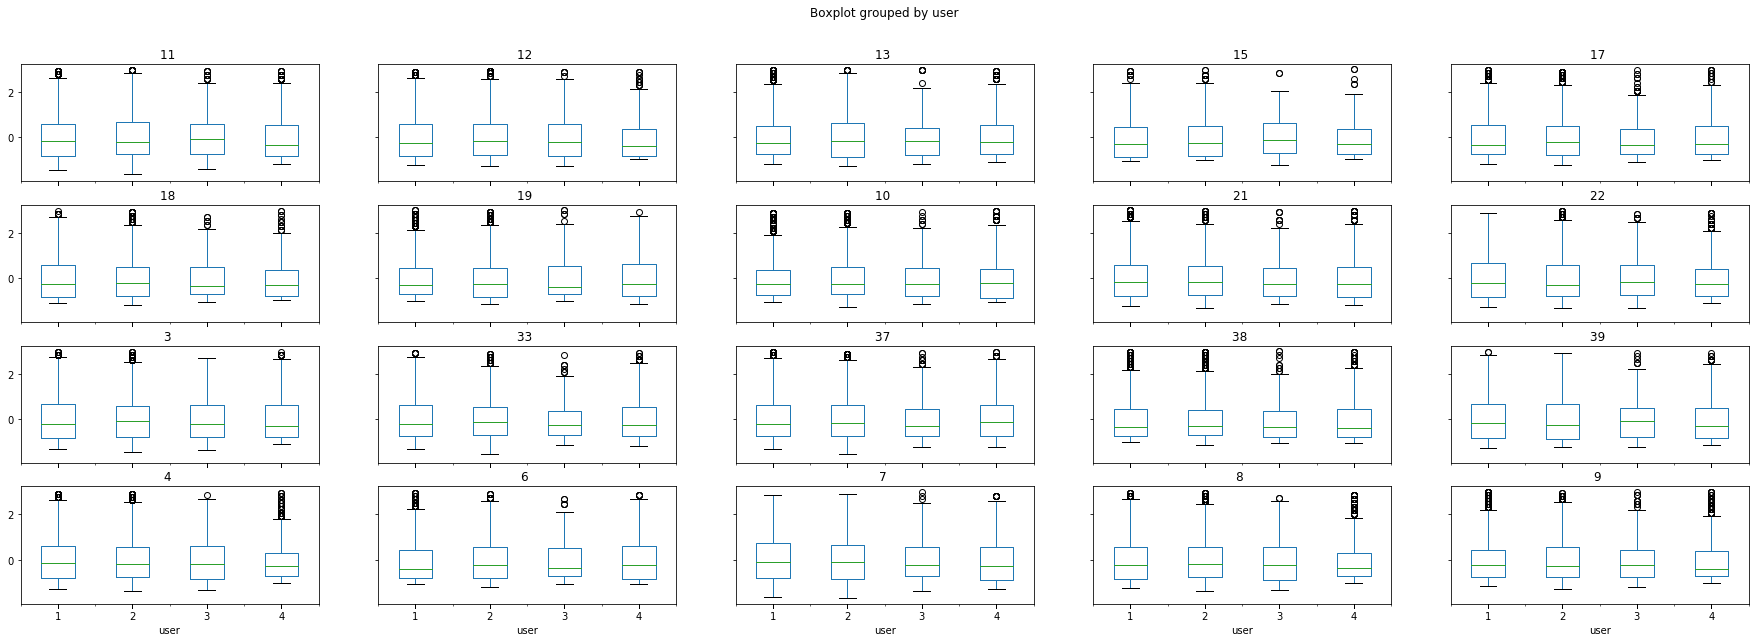

In [44]:
draw_boxplot(total_database, columnz=True)

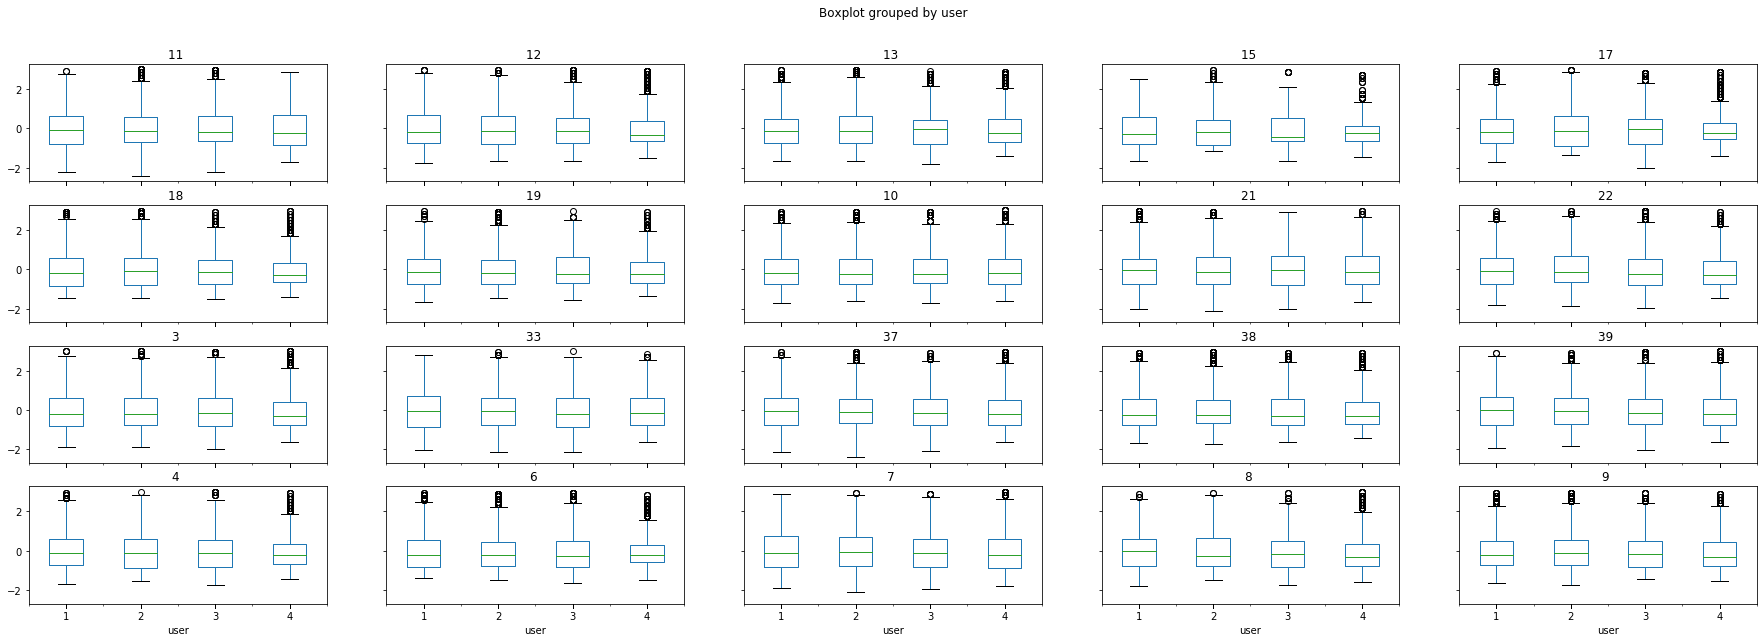

In [45]:
total_dataset['user'] = total_dataset['user'].astype(int)
draw_boxplot(total_dataset,columnz=True)

In [0]:
def t_test(user1, user2, cols, equal_var=False):
  s1 = pd.Series()
  s2 = pd.Series()
  for col in cols:
    #print(col)
    s1 = s1.append(user1[col].dropna()) 
    s2 = s2.append(user2[col].dropna())
    #print(stats.ttest_ind(user1[col].dropna(), user2[col].dropna(),equal_var=equal_var))
    t, p = stats.ttest_ind(user1[col].dropna(), user2[col].dropna(),equal_var=equal_var)
    print(round(p,4))
    #data3 = user3[col].dropna()
    #data4 = user4[col].dropna()
  t, p = stats.ttest_ind(s1, s2,equal_var=equal_var)
  print(round(p,4))

In [0]:
user_1_set.describe()

,11,12,13,15,17,18,19,10,21,22,3,33,37,38,39,4,6,7,8,9,x,y,user,11,12,13,15,17,18,19,10,21,22,3,33,37,38,39,4,6,7,8,9
count,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.0,3536.000000,2642.000000,2438.000000,305.000000,1671.000000,1884.000000,1633.000000,2197.000000,2840.000000,2490.000000,2823.000000,2238.000000,3207.000000,2910.000000,1911.000000,2436.000000,1779.000000,2694.000000,2326.000000,2839.000000
mean,-78.549651,-86.252495,-86.250749,-98.583583,-91.031188,-90.466567,-91.337575,-88.033683,-83.269461,-85.194361,-82.123253,-86.857036,-79.720309,-84.495010,-88.425649,-86.041667,-91.026447,-84.087076,-86.369760,-84.786427,14.925150,15.899202,3.0,-0.132987,-0.111322,-0.029021,0.098931,0.074269,-0.115239,-0.026812,-0.033553,0.016811,0.050750,0.045210,-0.123839,0.022892,-0.116047,0.039631,0.005839,-0.052707,-0.149537,0.004838,-0.157526
std,9.740098,11.131880,12.081652,5.079896,11.095330,10.875816,11.173209,11.836024,12.030875,12.610535,13.197083,12.464185,11.679091,11.081182,13.000354,12.567899,10.711396,12.486945,12.888282,11.550123,8.993433,9.579365,0.0,0.860327,0.891982,0.811903,0.861987,0.770781,0.843521,0.852216,0.889239,0.952622,0.871773,0.899168,0.800132,0.891245,0.896440,0.912869,0.879119,0.846954,0.876188,0.893268,0.926810
min,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,0.000000,0.000000,3.0,-2.092948,-1.607588,-1.595226,-1.321016,-1.501084,-1.443878,-1.463143,-1.621954,-1.935793,-1.751727,-1.773857,-1.924618,-1.870592,-1.608945,-1.821300,-1.533124,-1.442098,-1.844938,-1.567942,-1.558571
25%,-82.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-84.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,7.000000,8.000000,3.0,-0.702721,-0.768073,-0.683010,-0.473494,-0.527866,-0.759020,-0.636525,-0.649772,-0.763838,-0.669035,-0.696185,-0.825775,-0.651016,-0.803420,-0.628687,-0.695030,-0.742764,-0.845587,-0.610964,-0.918803
50%,-77.000000,-84.000000,-84.000000,-100.000000,-100.000000,-100.000000,-100.000000,-86.000000,-81.000000,-83.000000,-80.000000,-83.000000,-78.000000,-83.000000,-100.000000,-84.000000,-100.000000,-81.000000,-85.000000,-84.000000,15.000000,16.000000,3.0,-0.285653,-0.208397,-0.031427,-0.303990,0.028258,-0.211133,-0.223216,-0.233123,-0.031367,-0.127688,-0.097479,-0.276354,-0.108982,-0.400657,-0.098637,-0.096392,-0.183296,-0.220992,-0.132476,-0.279035
75%,-73.000000,-78.000000,-77.000000,-100.000000,-81.000000,-82.000000,-82.000000,-79.000000,-74.000000,-75.000000,-73.000000,-77.000000,-72.000000,-77.000000,-77.000000,-76.000000,-82.000000,-74.000000,-76.000000,-77.000000,23.000000,24.000000,3.0,0.409461,0.351280,0.457260,0.543533,0.445352,0.336753,0.603402,0.461293,0.701105,0.548995,0.620969,0.410423,0.568560,0.404868,0.563926,0.502247,0.376171,0.403602,0.585257,0.360734
max,-48.000000,-49.000000,-47.000000,-66.000000,-56.000000,-52.000000,-49.000000,-52.000000,-45.000000,-49.000000,-44.000000,-45.000000,-46.000000,-46.000000,-49.000000,-51.000000,-55.000000,-51.000000,-48.000000,-38.000000,30.000000,32.000000,3.0,2.772847,2.869825,2.705221,2.747090,2.808881,2.802242,2.807716,2.822305,2.898520,2.985054,2.776313,2.608109,2.872203,2.955698,2.949152,2.896801,2.753908,2.777061,2.977700,2.919807


In [14]:
column=['11 ', '12 ', '13 ', '15 ', '17 ','18 ', '19 ', '10 ', '21 ', '22 ', '3 ', '33 ','37 ', '38 ', '39 ','4 ', '6 ', '7 ', '8 ', '9 ']
user_1_base = tmp_table_z[tmp_table_z['user']==1]
user_1_set = tmp_table_z_dataset[tmp_table_z_dataset['user']==1]
user_1_base.describe()
#
#user_1_set.describe()
#user_2_set = tmp_table_z_dataset[tmp_table_z_dataset['user']==1]
t_test(user_1_base,user_1_set,column)

NameError: ignored

In [15]:
t_test(tmp_table_z_1,tmp_table_z_2,column)

0.7267
0.8706
0.9656
0.8028
0.8997
0.9102
0.7083
0.8949
0.5172
0.9937
0.9632
0.7493
0.6498
0.9211
0.7511
0.9182
0.6963
0.9555
0.9361
0.84
0.791


In [23]:
import scipy.stats as stats

def anova_test(user1, user2, user3, user4, cols):
  s1 = pd.Series()
  s2 = pd.Series()
  s3 = pd.Series()
  s4 = pd.Series()
  for col in cols:
    #print(col)
    s1 = s1.append(user1[col].dropna()) 
    s2 = s2.append(user2[col].dropna())
    s3 = s3.append(user3[col].dropna())
    s4 = s4.append(user4[col].dropna())
    x, p = stats.f_oneway(user1[col].dropna(), user2[col].dropna(), user3[col].dropna(), user4[col].dropna())
    print(round(p,4))
  t, p = stats.f_oneway(s1, s2, s3, s4)
  print(round(p,4))
#(7.1210194716424473, 0.00028122423145345439)
anova_test(tmp_table_z_dataset_1,tmp_table_z_dataset_2,tmp_table_z_dataset_3, tmp_table_z_dataset_4,column)

0.9375
0.7416
0.8279
0.7886
0.2053
0.5303
0.8488
0.9934
0.973
0.5852
0.6984
0.8861
0.9907
0.9188
0.9949
0.0382
0.5113
0.8164
0.6096
0.7433
0.017
